In [1]:
import pandas as pd

# Load dataset

In [2]:
df = pd.read_csv("dataset/franceculture.csv")

In [3]:
df.shape

(29208, 16)

In [4]:
df.head()

,diffusion_id,diffusion_title,concept_title,diffusion_url,diffusion_start_date,diffusion_end_date,diffusion_station_name,magnetotheque_id,manifestation_id,manifestation_url,step_duration,manifestation_duration,taxonomy_ids,personality_ids,concept_uuid,diffusion_standfirst
0,fabe519b-a2b7-49e6-b6f6-5fb817c9b1b5,Festival de Vaison la Romaine : Les Mystères d...,LES NUITS DE FRANCE CULTURE,https://www.radiofrance.fr/franceculture/podca...,2022-01-01 00:01:40,2022-01-01 02:36:40,France Culture,2021C3372E0422,df336904-9657-4a2f-8e4c-993a129a8bae,https://rf.proxycast.org/df336904-9657-4a2f-8e...,9300,9299,NaN,aa1d1ba5-fdb3-11e1-a7b7-782bcb76618d|0aacd3f4-...,4ff3693f-6e66-11e5-8e9e-005056a87c89,NaN
1,57876f73-171f-4b1b-806e-7bd652412824,Nuits magnétiques - Dans le Grand Nord 5/5 (1è...,LES NUITS DE FRANCE CULTURE,https://www.radiofrance.fr/franceculture/podca...,2022-01-01 02:36:40,2022-01-01 04:06:40,France Culture,2018C3372E0552,21b6d488-9898-41d4-b45f-8e1414f498ab,https://rf.proxycast.org/21b6d488-9898-41d4-b4...,5400,5399,NaN,0aacd3f4-75da-11e2-a7b7-782bcb76618d|e6bffa30-...,4ff3693f-6e66-11e5-8e9e-005056a87c89,NaN
2,aa85efa1-784f-449b-a5ff-3cd998ddee17,"Il fut la voix d’Astérix, de Jack Lemmon ou de...",LES NUITS DE FRANCE CULTURE,https://www.radiofrance.fr/franceculture/podca...,2022-01-01 04:06:45,2022-01-01 04:56:45,France Culture,2020C3372E0512,a9a00068-8dfd-4b31-a8a8-7c8afe2d5166,https://media.radiofrance-podcast.net/podcast0...,3000,3000,8b78fb1a-bf1e-436e-a2fc-4375fa38154b|8993e1ce-...,0aacd3f4-75da-11e2-a7b7-782bcb76618d|29985da8-...,4ff3693f-6e66-11e5-8e9e-005056a87c89,"La voix inoubliable d’Astérix, de Benny Hill, ..."
3,518e90a5-ed57-4e85-99a4-ca384561dfd8,"Femmes dans la Cité : voyages, femmes dans le ...",LES NUITS DE FRANCE CULTURE,https://www.radiofrance.fr/franceculture/podca...,2022-01-01 04:56:45,2022-01-01 05:56:45,France Culture,2021C3372E0454,76430fd5-c86d-4ea7-a5d9-bb10c5536ced,https://media.radiofrance-podcast.net/podcast0...,3600,3600,ef694d8a-2ca2-4d45-bcb2-cc87cebbff8d|e52bdd20-...,aa1d1ba5-fdb3-11e1-a7b7-782bcb76618d|d454acf8-...,4ff3693f-6e66-11e5-8e9e-005056a87c89,"Femmes voyageuses, sédentaires ; mobilités géo..."
4,c940d73a-3bf7-4083-8a29-a49e64088040,2022 : IAM toujours en vie,AFFINITES CULTURELLES,https://www.radiofrance.fr/franceculture/podca...,2022-01-01 06:00:00,2022-01-01 06:58:59,France Culture,2021C45176E0018,f5f07676-cb81-4ce1-8c91-3b6cd4305389,https://rf.proxycast.org/f5f07676-cb81-4ce1-8c...,3539,3539,8b78fb1a-bf1e-436e-a2fc-4375fa38154b|c495dd3c-...,7a31088e-a8bf-102d-b970-fcfcfc001444|914c37b2-...,d615ba58-726c-41d4-997e-c28c8b52f694,"Pour la première émission de l'année, une revu..."


# Visualize the number of diffusions by concept

First lets get familiar with the data

In [5]:
df.concept_title.value_counts()

concept_title
LES NUITS DE FRANCE CULTURE                                                       4418
France Culture va plus loin                                                        953
La revue de presse internationale                                                  718
LSD - documentaire + podcast (ac 28/02/2022) / ex-LSD, annonces + documentaire     688
JOURNAL DE 18H                                                                     628
                                                                                  ... 
NOEL ORTHODOXE                                                                       2
MECANIQUES DE LA JUSTICE                                                             2
FRENCH CONNECTION : MARSEILLE, MONTREAL, NEW YORK                                    2
PAQUES ORTHODOXES                                                                    2
VOEUX DU PRESIDENT DE LA REPUBLIQUE                                                  1
Name: count, Length: 177, dty

We can see that the concept "LES NUITS DE FRANCE CULTURE" has a lot of diffusion compared to the other concepts.

We can exclude it from the analysis because it is broadcasted every night.

In [6]:
df = df[df["concept_title"] != "LES NUITS DE FRANCE CULTURE"]

In [7]:
df.concept_title.value_counts()

concept_title
France Culture va plus loin                                                       953
La revue de presse internationale                                                 718
LSD - documentaire + podcast (ac 28/02/2022) / ex-LSD, annonces + documentaire    688
JOURNAL DE 18H                                                                    628
JOURNAL DE 7H                                                                     622
                                                                                 ... 
EN-QUETE D'IDEES                                                                    2
MECANIQUES DE LA JUSTICE                                                            2
L'ASSEMBLEE DU DESERT                                                               2
NOEL ORTHODOXE                                                                      2
VOEUX DU PRESIDENT DE LA REPUBLIQUE                                                 1
Name: count, Length: 176, dtype: int64

Let's see now if we have duplicated diffusions.

In [8]:
df[df.diffusion_id.duplicated()]

,diffusion_id,diffusion_title,concept_title,diffusion_url,diffusion_start_date,diffusion_end_date,diffusion_station_name,magnetotheque_id,manifestation_id,manifestation_url,step_duration,manifestation_duration,taxonomy_ids,personality_ids,concept_uuid,diffusion_standfirst
13,ffd4956a-73ec-4788-8f45-3c29f657defa,"François Taddei : ""La coopération est l'avenir...",L'invité-e des Matins du samedi,https://www.radiofrance.fr/franceculture/podca...,2022-01-01 08:34:00,2022-01-01 08:45:00,France Culture,2022C45858S1001,647c6042-98bb-4a73-b3bd-5e7fca41deeb,https://media.radiofrance-podcast.net/podcast0...,660,1882,d22da8d8-f95c-49a6-b107-edcbebacd84a|cc6810e9-...,8f8dac15-0a1f-4c2c-a498-8cbbdca566ee|473c280e-...,0c4e5a83-7dbf-4ae4-85d5-b1c6bf72f941,« Et si nous » c’est le titre d’un livre stimu...
80,2195814c-5e5f-42bc-93f8-653bd7a4fecd,Sur la trompe,UNE HISTOIRE PARTICULIERE,https://www.radiofrance.fr/franceculture/podca...,2022-01-03 03:57:46,2022-01-03 04:27:16,France Culture,2022C26160S0001,2fba8c94-47a3-4229-b65d-e4347624bf3d,https://media.radiofrance-podcast.net/podcast0...,1770,1728,ef694d8a-2ca2-4d45-bcb2-cc87cebbff8d|d22da8d8-...,bf635a90-3624-11e1-a6ab-842b2b72cd1d|9708dc92-...,0ad98f5d-a973-418f-93f8-ee974c963957,C’est l’histoire d’un éléphant. Il ne traverse...
81,b85365e6-d6d3-41fe-93e4-1c37cada7bca,La révérence du pachyderme,UNE HISTOIRE PARTICULIERE,https://www.radiofrance.fr/franceculture/podca...,2022-01-03 04:27:16,2022-01-03 04:56:46,France Culture,2022C26160S0002,be315d23-4dab-4ba7-b26d-28e4149fca7d,https://media.radiofrance-podcast.net/podcast0...,1770,1738,ef694d8a-2ca2-4d45-bcb2-cc87cebbff8d|d22da8d8-...,bf635a90-3624-11e1-a6ab-842b2b72cd1d|9708dc92-...,0ad98f5d-a973-418f-93f8-ee974c963957,Et si les éléphants disparaissent progressivem...
97,fbebb2ac-6e4b-47c5-8df4-561f93c37fd9,"État d’urgence sanitaire : concilier droit, sa...",France Culture va plus loin,https://www.radiofrance.fr/franceculture/podca...,2022-01-03 08:19:15,2022-01-03 08:46:30,France Culture,2022C16450S0003,1efa4dbf-e640-477b-9a26-3a0bb107446c,https://media.radiofrance-podcast.net/podcast0...,1635,2522,af8f170d-8e3b-4f21-a022-f51724d52971|4bc1c7b4-...,5a3a3074-db5e-420b-b11f-43eb783cd6ab|cf037c90-...,7431a6a7-481b-11e5-9fe0-005056a87c89,"Presque deux ans après le début de l’épidémie,..."
107,86ffdce7-b69c-4cc4-a5f2-51a648d73f71,"Soudan : démission d'Abdallah Hamdok, symbole ...",La revue de presse internationale,https://www.radiofrance.fr/franceculture/podca...,2022-01-03 11:53:00,2022-01-03 11:58:00,France Culture,2022C22811S0003,bb5b75db-15c7-452b-8da1-edbb36a2191d,https://media.radiofrance-podcast.net/podcast0...,300,369,2147f5fa-341a-438f-bb87-c6077b09ed25|722ea41b-...,ec9987ed-3be5-4b7d-a9c6-ec2e187fdb58|03a848a7-...,bd43a733-4811-11e5-9fe0-005056a87c89,Trois ans après la chute d'Omar Al-Bachir au S...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29162,02e0f09d-2c7b-4b26-bb79-18f637dc94ac,"Léonor de Récondo : ""Il y a une continuité ent...",LE COURS DE L'HISTOIRE,https://www.radiofrance.fr/franceculture/podca...,2023-09-29 22:00:00,2023-09-29 22:58:45,France Culture,2023C36128S0272,e8c09eee-38a3-4851-88ee-12e06d1abc8d,https://media.radiofrance-podcast.net/podcast0...,3525,3499,0ed7f30a-aa92-4ac0-83d3-7a34eef8fc96|0f93bac7-...,d4751836-a1a7-11e0-b8ee-842b2b72cd1d|25a95390-...,0a41bdd2-4a6d-4fb2-b2d1-ca42d2dc5381,"Dans son nouveau roman ""Le Grand Feu"", l’écriv..."
29163,9553843f-c2f3-4538-99a0-4213f10b7112,Harcèlement scolaire : comment expliquer la cr...,AVEC PHILOSOPHIE,https://www.radiofrance.fr/franceculture/podca...,2023-09-29 22:58:45,2023-09-29 23:57:30,France Culture,2023C48904S0272,99a201ee-077d-4255-a5da-138800dd9df5,https://media.radiofrance-podcast.net/podcast0...,3525,3495,5320d48b-ffcb-446f-a3c6-0a7a0e7d58ef|58daaa5b-...,977b3a76-a00f-102d-9c2c-fcfcfc001444|385985ee-...,744d0dc6-dacc-4d71-a22c-af97eec7a56e,Deux actualités : \n\nLe harcèlement scolaire ...
29180,9b8e3f30-acae-494f-a1f3-63e3738fa61d,Les 

We can see that we have duplicated diffusions. Let's remove them.

In [9]:
df.drop_duplicates(subset=["diffusion_id"], inplace=True)

In [10]:
df[df.diffusion_id.duplicated()]

,diffusion_id,diffusion_title,concept_title,diffusion_url,diffusion_start_date,diffusion_end_date,diffusion_station_name,magnetotheque_id,manifestation_id,manifestation_url,step_duration,manifestation_duration,taxonomy_ids,personality_ids,concept_uuid,diffusion_standfirst


We can now see the number of diffusions by concept after we have cleaned the Data :

In [11]:
df.concept_title.value_counts()

concept_title
JOURNAL DE 18H                         628
JOURNAL DE 8H                          622
JOURNAL DE 7H                          622
JOURNAL DE 12H30                       622
France Culture va plus loin            538
                                      ... 
NOEL ORTHODOXE                           2
MECANIQUES DE LA JUSTICE                 2
EN-QUETE D'IDEES                         2
L'ASSEMBLEE DU DESERT                    2
VOEUX DU PRESIDENT DE LA REPUBLIQUE      1
Name: count, Length: 176, dtype: int64

Let's plot this data in a horizontal bar chart.

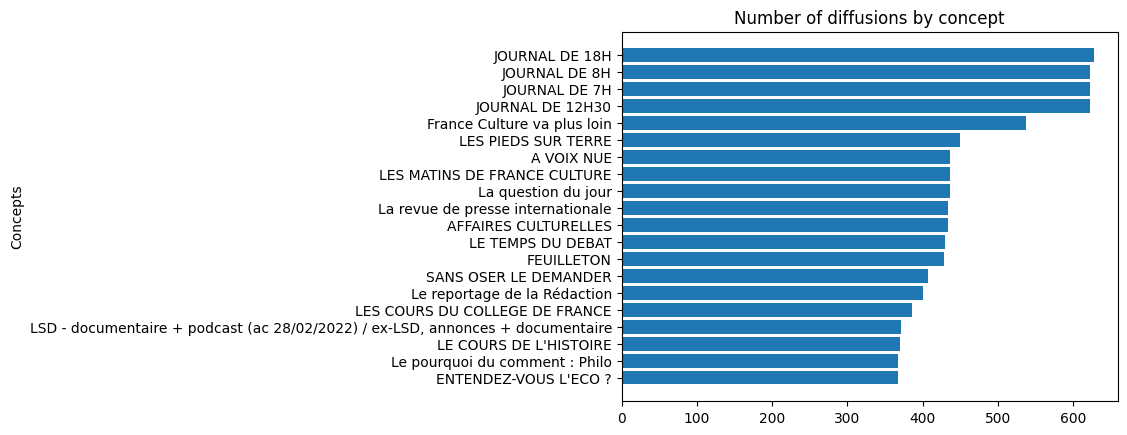

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

data = df.concept_title.value_counts()[:20]
labels = data.index

ax.barh(labels, data)

ax.set_ylabel('Concepts')
ax.set_title('Number of diffusions by concept')
ax.invert_yaxis()

plt.show()